# Feature Engineering Domain Analysis Model Selection & Tuning

### Prediction of compressive strength of Cement using Feature Engineering, Domain Analysis, Model Selection and Tuning

1. Exploratory Data Analysis with Univariate and Multivariate analysis, with strategies to address data challenges esp. zero and unknown values, outliers etc.

2. Domain analysis: Understanding inter-relation of various factors that comtribute to compressive strength of cement 

3. Feature Engineering: Exploring opportunities to create composite features, dropping insignificant features and applying transformation & standardization on some features 

4. Feature Engineering: Exploring gaussians to understand if data is likely to be a mix of gaussians, exploring individual cluster and independent attributes for their suitability to predict strength using K-means clustering

5. Feature Engineering: Obtaining feature importance for the individual features using multiple methods 

6. Model Selection and Tuning: Trying with various model complexities - from simple linear mode in terms of parameters or with a quadratic or higher degree 

7. Model Selection and Tuning: Explore suitable algorithms for the data and drawing inferences 

8. Statistical conclusion for predicting model performance range at 95% confidence level

Data Source: https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

##### Import of necessary packages 

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# For Ridge and Lasso and Polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# To report the prediction shape 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# For cluster analysis using K Means clustering 
from sklearn.cluster import KMeans

# For Log Transformation 
from scipy.stats import boxcox

# To plot graphs (visualization)
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline 

##### Load the Dataset

In [2]:
Concrete_df = pd.read_csv("concrete.csv")

In [3]:
Concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
print(Concrete_df.shape)

(1030, 9)


In [5]:
Concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# There are no null values in any of the columns. 

##### Variable Information (provided with the dataset):

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

-- Name ------------------------------ Data Type ----- Measurement -- Description

1. Cement (component 1)             -- quantitative -- kg in a m3 mixture -- Input Variable

2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

3. Fly Ash (component 3)            -- quantitative -- kg in a m3 mixture -- Input Variable

4. Water (component 4)              -- quantitative -- kg in a m3 mixture -- Input Variable

5. Superplasticizer (component 5)   -- quantitative -- kg in a m3 mixture -- Input Variable

6. Coarse Aggregate (component 6)   -- quantitative -- kg in a m3 mixture -- Input Variable

7. Fine Aggregate (component 7)     -- quantitative -- kg in a m3 mixture -- Input Variable

8. Age                              -- quantitative -- Day (1~365)        -- Input Variable

9. Concrete compressive strength    -- quantitative -- MPa                -- Output Variable 


## Univariate Analysis 

In [6]:
Concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Analysis of Domain information from internet to help decisions 

1. Superplasticizer (high range water reducing admixture) Admixture which permits a high reduction in the 
water content of a given mix without affecting the consistence, or which increases 
the slump/flow considerably without affecting the water content; or produces both effects simultaneously.

2. Fly ash is a fine ash from coal-fired power stations which is used as an additive for both cement and concrete.

a. The use of fly ash in portland cement concrete (PCC) has many benefits and improves concrete performance in both the fresh and hardened state. Fly ash use in concrete improves the workability of plastic concrete, and the strength and durability of hardened concrete. Fly ash use is also cost effective.

b. Generally, fly ash benefits fresh concrete by reducing the mixing water requirement and improving the paste flow behavior. One of the primary benefits of fly ash is its reaction with available lime and alkali in concrete, producing additional cementitious compounds.

c. Fly ash is used to lower the cost and to improve the performance of PCC. Typically, 15 percent to 30 percent of the portland cement is replaced with fly ash, with even higher percentages used for mass concrete placements.

3. Aggregates -

a. Aggregate is commonly considered inert filler, which accounts for 60 to 80 percent of the volume and 70 to 85 percent of the weight of concrete. Although aggregate is considered inert filler, it is a necessary component that defines the concrete’s thermal and elastic properties and dimensional stability.

b. Aggregate is classified as two different types, coarse and fine. Coarse aggregate is usually greater than 4.75 mm (retained on a No. 4 sieve), while fine aggregate is less than 4.75 mm (passing the No. 4 sieve).

c. The compressive aggregate strength is an important factor in the selection of aggregate. When determining the strength of normal concrete, most concrete aggregates are several times stronger than the other components in concrete and therefore not a factor in the strength of normal strength concrete. Lightweight aggregate concrete may be more influenced by the compressive strength of the aggregates.

d. The composition, shape, and size of the aggregate all have significant impact on the workability, durability, strength, weight, and shrinkage of the concrete.

e. Aggregate gradation, whether in a mortar concrete or a traditional concrete mix, involves tradeoffs between strength and workability and is always a delicate balance. Understanding the implications of aggregate gradation is especially important when creating a from-scratch mix and will ultimately help you produce a better concrete countertop.

4. Water Cement Ratio -

a. In concrete, the single most significant influence on most or all of the properties is the amount of water used in the mix.

b. In concrete mix design, the ratio of the amount of water to the amount of cement used (both by weight) is called the water to cement ratio (w/c). These two ingredients are responsible for binding everything together.

c. The water to cement ratio largely determines the strength and durability of the concrete when it is cured properly. The w/c ratio refers to the ratio of the weights of water and cement used in the concrete mix. A w/c ratio of 0.4 means that for every 100 lbs of cement used in the concrete, 40 lbs of water is added.

5. Coarse to fine aggregate ratio -

a. There is an optimum coarse to fine aggregate ratio for RCCP.

b. Increasing cement from 9% to 12% has significant effect on the properties of RCCP.

c. Coarse to fine aggregate ratio influences the porosity of RCCP.

6. Slag cement proportion -

a. Ground granulated blast furnace slag is widely used as a mineral admixture to replace partial Portland cement in the concrete industry.

b. As the amount of slag increases, the late-age compressive strength of concrete mixtures increases.

c. However, after an optimum point, any further increase in slag does not improve the late-age compressive strength.

7. Superplasticizer proportion -
Increase of superplasticizer dose in concrete leads to gain of good ability in addition to slump. Moreover, there is also slightly increase in compressive strength than that of normal concrete.

8. Age - 

a. As per studies and researches, the compressive strength of the concrete will increase with age.

b. Most researches were conducted to study the 28th-day strength of concrete. But in reality, the strength at 28th day is less compared to the long-term strength that it can gain with age.

c. The process of continued hydration will increase the strength of concrete. If the environmental conditions to which the concrete is exposed facilitates the hydration, the strength is gained continuously with age. But this rate of hydration is fast at the early stages and delays later.

9. Important ratios influencing concrete strength -

a. Water / cement ratio

b. Coarse / fine aggregate ratio

c. Aggregate / cement Ratio

d. Ash / cement ratio

##### Analyze missing (zero) values and outliers 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B61F048>,
      dtype=object)

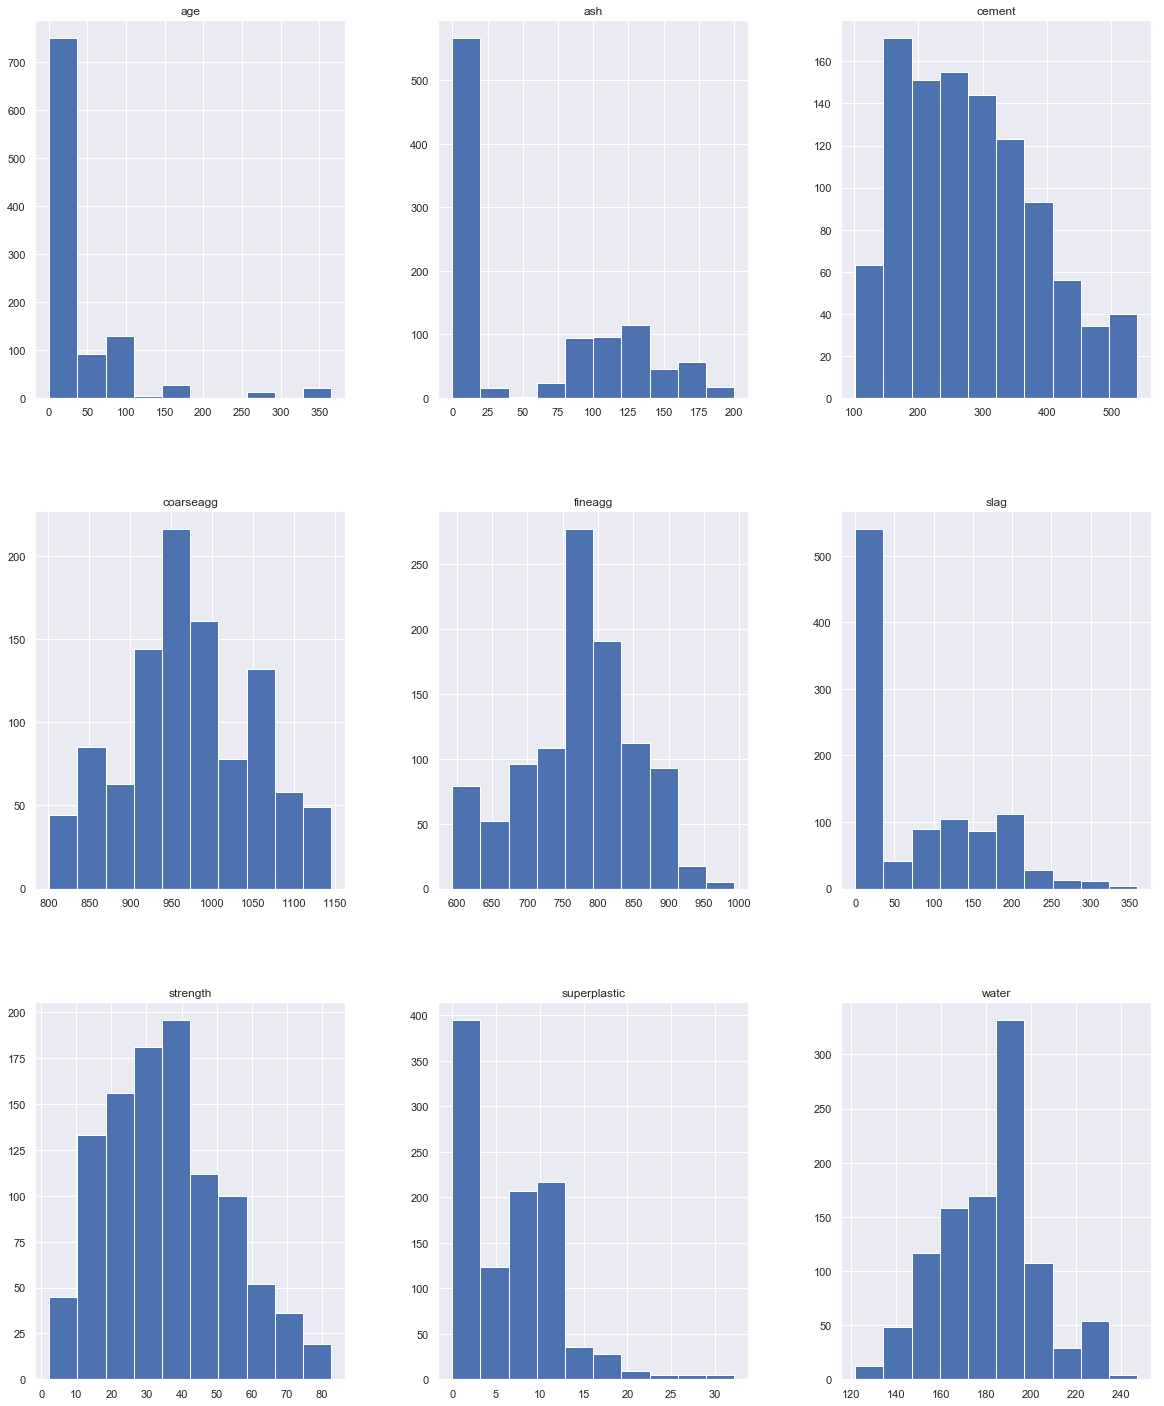

In [7]:
Concrete_df.hist(figsize=(20,25))

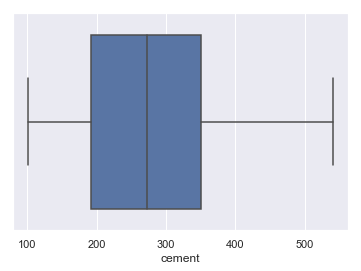

In [8]:
sns.boxplot(Concrete_df['cement'])

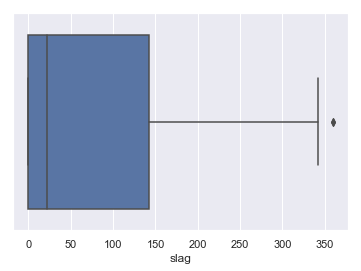

In [9]:
sns.boxplot(Concrete_df['slag'])

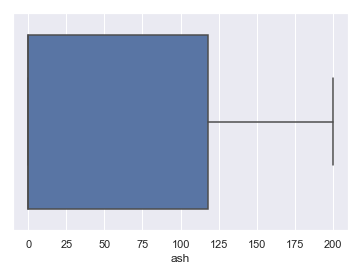

In [10]:
sns.boxplot(Concrete_df['ash'])

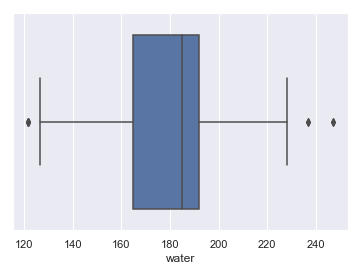

In [11]:
sns.boxplot(Concrete_df['water'])

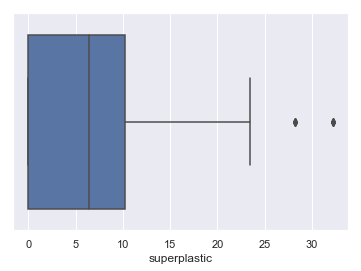

In [12]:
sns.boxplot(Concrete_df['superplastic'])

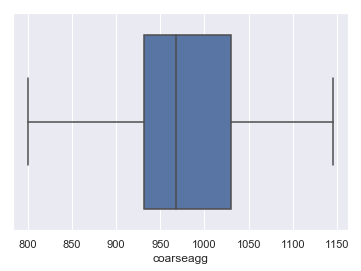

In [13]:
sns.boxplot(Concrete_df['coarseagg'])

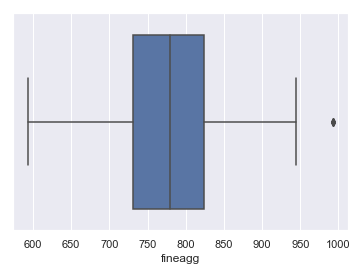

In [14]:
sns.boxplot(Concrete_df['fineagg'])

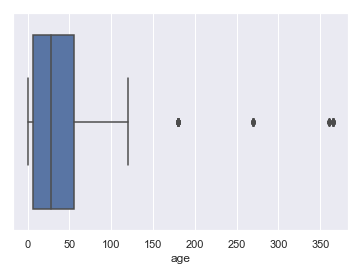

In [15]:
sns.boxplot(Concrete_df['age'])

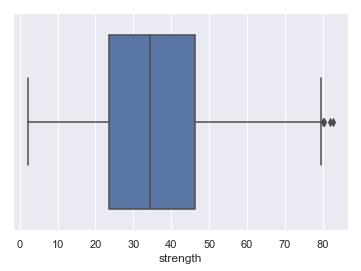

In [16]:
sns.boxplot(Concrete_df['strength'])

##### Analyze zero values 

In [17]:
print((Concrete_df[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']]==0).sum())

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64


##### Zero value analysis - Conclusion 

1. slag, ash and superplastic can theoretically have zero values based on domain understanding. This is because,
these are not essential components of concrete, they are added based on the end application of concrete. 

2. The zero values in these three columns are non-co-occurring, which points that these zero values 
would not be due to oversight, but actual values. 

3. Through manual filtering of the csv file, it was observed that the sum of all the components of concrete 
is more or less constant, in the range of 2200 to 2400. If the zero values were due to missing values, the sum of 
components may have differed, and would have been especially less where these columns had zero values. But that is 
not the case. 

Due to these reasons, it is assumed that zero values are valid, and there will be no replacement for zero values. 


### Observations from Univariate Analysis 

1. cement

a. Histogram shows near normal distribution with a tail on right side. 

b. Box plot shows there are no outliers. 


2. slag

a. Histogram indicates very high number of zero values. Non-zero values are well distributed, with a slight tail
on the right side. 

b. Box plot shows outliers are placed just outside the upper limit, do not indicate an anomaly.  


3. ash

a. Histogram indicates very high number of zero values. Non-zero values are well distributed. 

b. Box plot shows there are no outliers. 


4. water

a. Histogram shows near normal distribution. 

b. Box plot shows very few outliers on both sides, but do not indicate an anomaly. 


5. superplastic

a. Histogram indicates very high number of zero values. Non-zero values are well distributed, with a slight tail
on the right side. But this is not a problem, because superplasticizer may not be used in several instances. 

b. Box plot shows few outliers on higher side. 


6. coarseagg

a. Histogram shows a normal distribution.

b. Box plot shows there are no outliers.


7. fineagg

a. Histogram shows near normal distribution.

b. Box plot shows few outliers on higher side. 


8. age

a. Histogram indicates long tail on the right. However, that is due to the fact that concrete strength data 
is collected at age of upto 28 days, then at ages of 6 months, 9 months and 1 year. 

b. Box plot shows outliers on higher side. But it is not an anomaly, it is due to the fact that concrete 
strength data is collected at age of upto 28 days, then at ages of 6 months, 9 months and 1 year. 


9. strength

a. Histogram shows near normal distribution, with slightly higher number of lower range values. 

b. Box plot shows few outliers on higher side. 



## Multivariate Analysis 

##### Pair Plot Analysis 

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


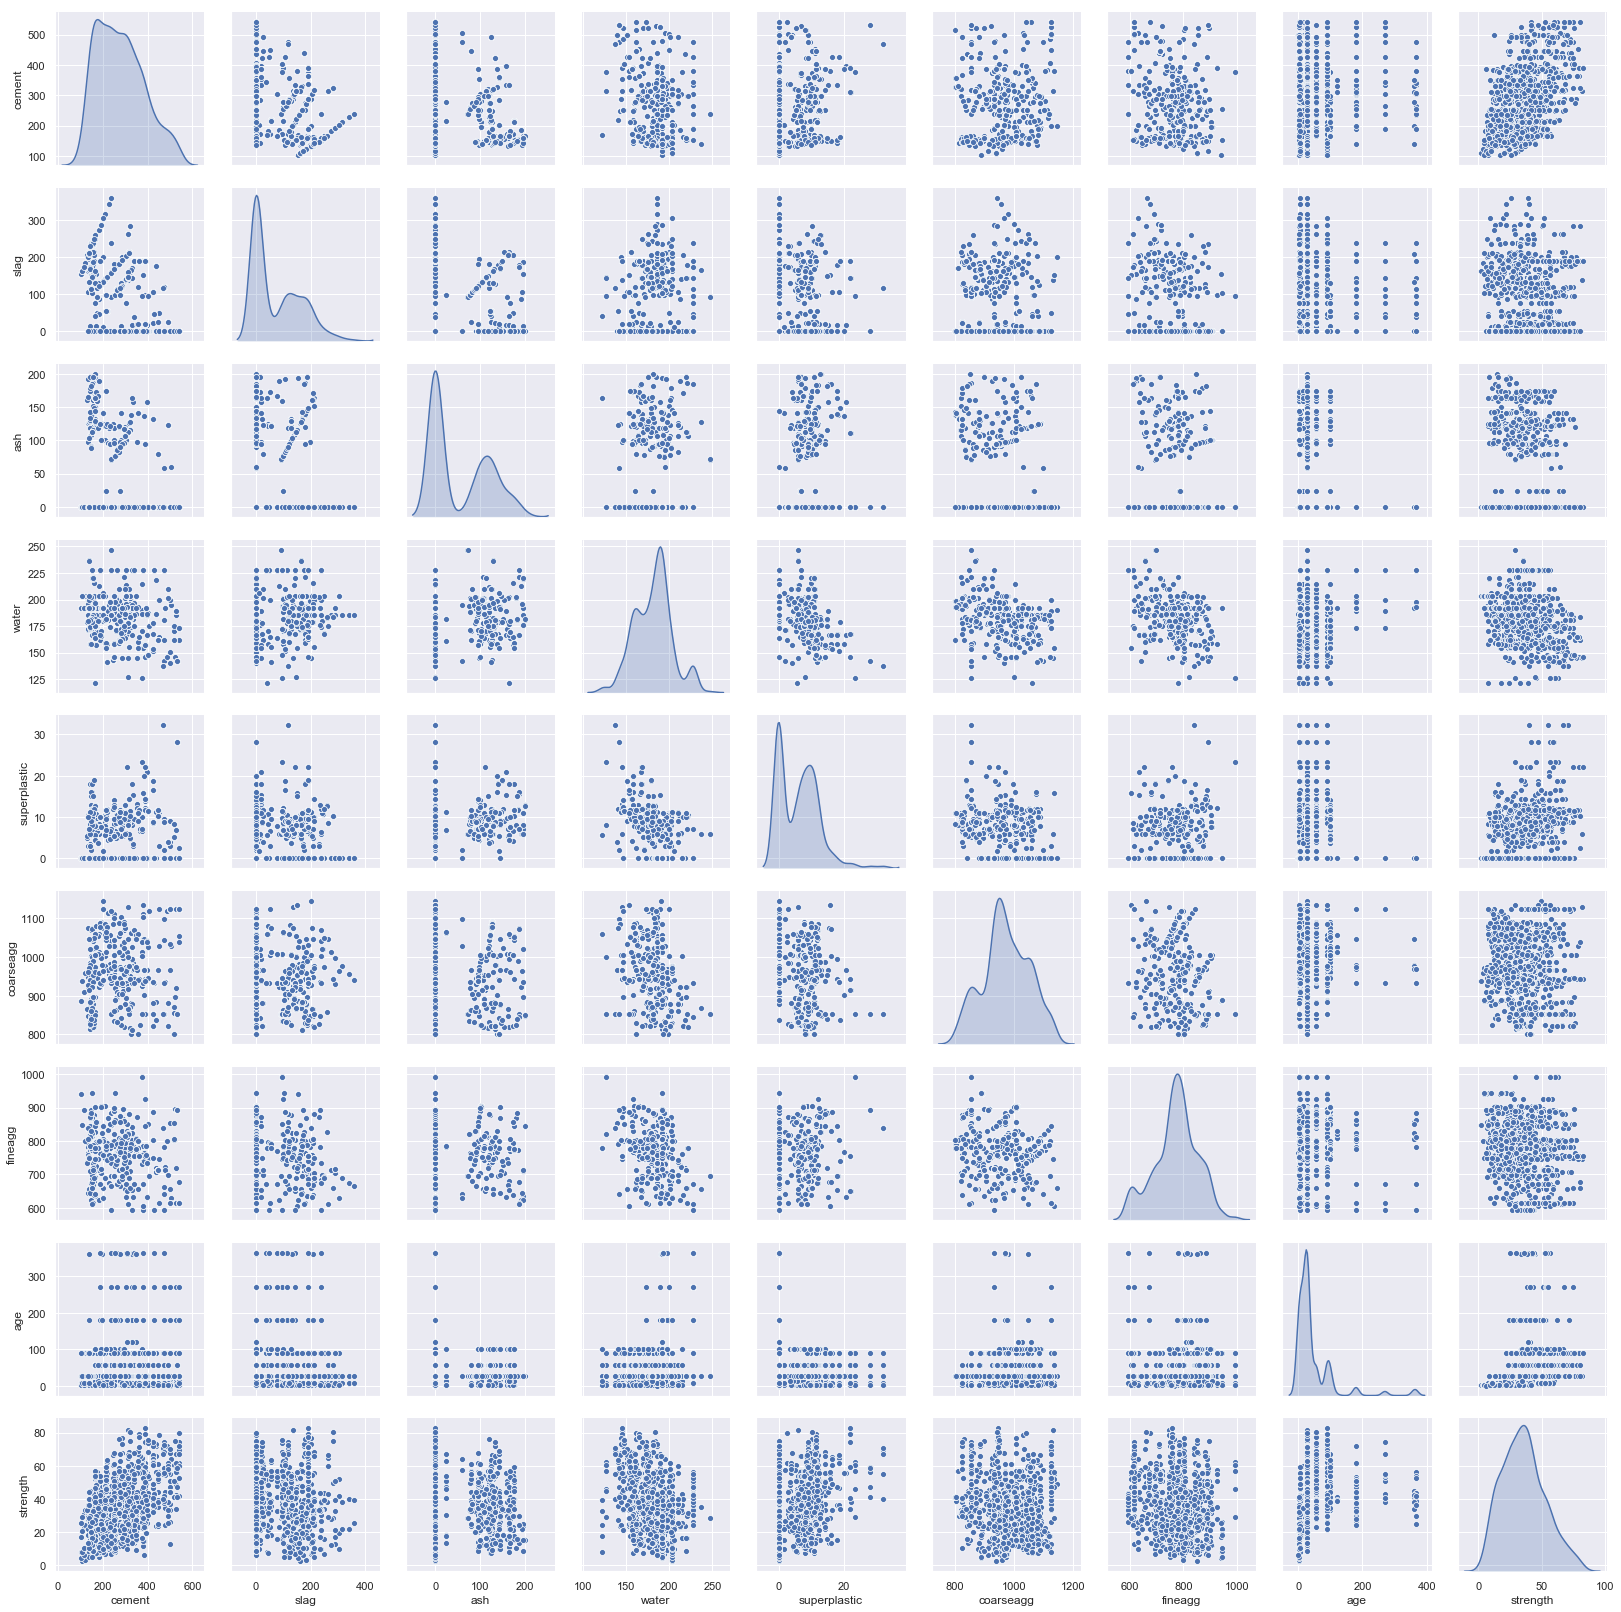

In [18]:
sns.pairplot(Concrete_df,diag_kind='kde') 

##### Correlation Analysis

In [19]:
corr = Concrete_df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


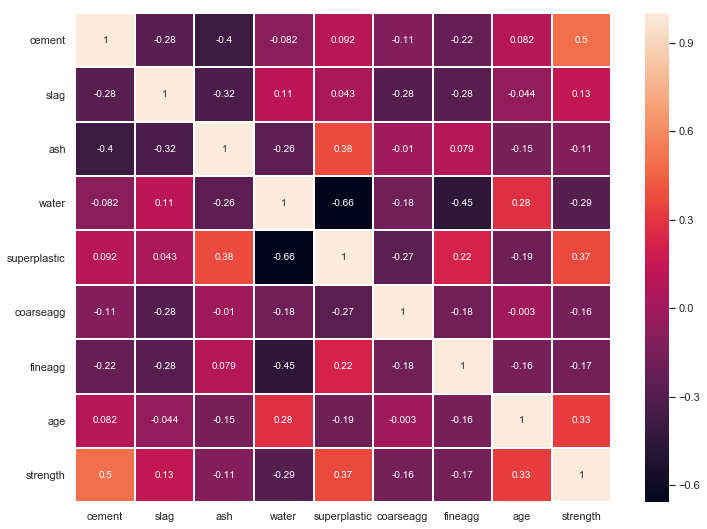

In [20]:
# Plot correlation heat map for better visualisation 
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True,linewidths=1)

## Inference from Pairplot and Correlation Analysis

1. Strength has positive correlation with cement, superplastic and age. 

2. Strength has negative correlation with water. 

3. Cement has negative correlation with slag and ash, because they are used as replacement of cement. 

4. Cement has weak correlation with water. However, since strength has positive correlation with cement, 
and negative correlation with water, it will be useful to consider another attribute that has ratio of 
cement and water. 

5. Slag has negative correlation with ash and aggregators. 

6. Ash has negative correlation with almost all other attributes, except superplastic. 

7. Water has very strong negative correlation with superplastic and fine aggregator. 

8. Superplastic has strong correlation with ash 

9. Coarse aggregator has negative correlation with all other attributes. 

10. Age has weak correlation with almost all attributes. 



## Strategies for addressing data challenges 


1. Data pollution / zero values - 

a. slag, ash and superplastic can theoretically have zero values based on domain understanding. This is because,
these are not essential components of concrete, they are added based on the end application of concrete. 

b. The zero values in these three columns are non-co-occurring, which points that these zero values 
would not be due to oversight, but actual values. 

c. Through manual filtering of the csv file, it was observed that the sum of all the components of concrete 
is more or less constant, in the range of 2200 to 2500. If the zero values were due to missing values, the sum of 
components may have differed, and would have been especially less where these columns had zero values. But that is 
not the case. 

Due to these reasons, it is assumed that zero values are valid, and there will be no replacement for zero values. 

2. Outliers - There are very few outliers for slag, water, superplastic, fineagg and age. However, they do not seem
like anomaly. 

3. Missing values - There are no missing values.


## Feature Engineering 

##### Normalization and composite features 

1. Transformation - Since the range for age is very big, log transformation can be used. 

2. Composite features - following additional ratios can be considered based on domain understanding - 

a. Water / cement ratio 

b. Coarse / fine aggregate ratio

c. Aggregate / cement Ratio

d. Ash / cement ratio 

e. Slag / cement ratio


##### Log transformation for age attribute 

In [21]:
Concrete_df['age_log'] = boxcox(Concrete_df['age'], 0.0)

In [22]:
Concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_log
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,3.332205


#### Add new composite columns 

In [23]:
# Water / cement ratio 
Concrete_df['water_cement'] = Concrete_df['water'] / Concrete_df['cement']

In [24]:
# Coarse / fine aggregate ratio
Concrete_df['coarse_fine'] = Concrete_df['coarseagg'] / Concrete_df['fineagg']

In [25]:
# Aggregate / cement Ratio
Concrete_df['agg_cement'] = (Concrete_df['coarseagg'] + Concrete_df['fineagg'] ) / Concrete_df['cement']

In [26]:
# Ash / cement ratio 
Concrete_df['ash_cement'] = Concrete_df['ash'] / Concrete_df['cement']

In [27]:
# Slag / cement ratio
Concrete_df['slag_cement'] = Concrete_df['slag'] / Concrete_df['cement']

In [28]:
# Superplastic / cement ratio
Concrete_df['Superp_cement'] = Concrete_df['superplastic'] / Concrete_df['cement']

In [29]:
Concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_log,water_cement,coarse_fine,agg_cement,ash_cement,slag_cement,Superp_cement
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,3.332205,1.440198,1.298330,12.174805,0.000000,1.500354,0.000000
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2.639057,0.937241,1.357448,11.113085,0.735938,0.249852,0.063943
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,3.332205,0.749600,1.111124,7.272400,0.382800,0.000000,0.022000
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,3.332205,0.857143,1.391045,6.022556,0.000000,0.428571,0.000000
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,3.332205,1.248708,1.503373,11.266796,0.000000,1.184755,0.058786


#### Pair Plot Analysis after adding new features 

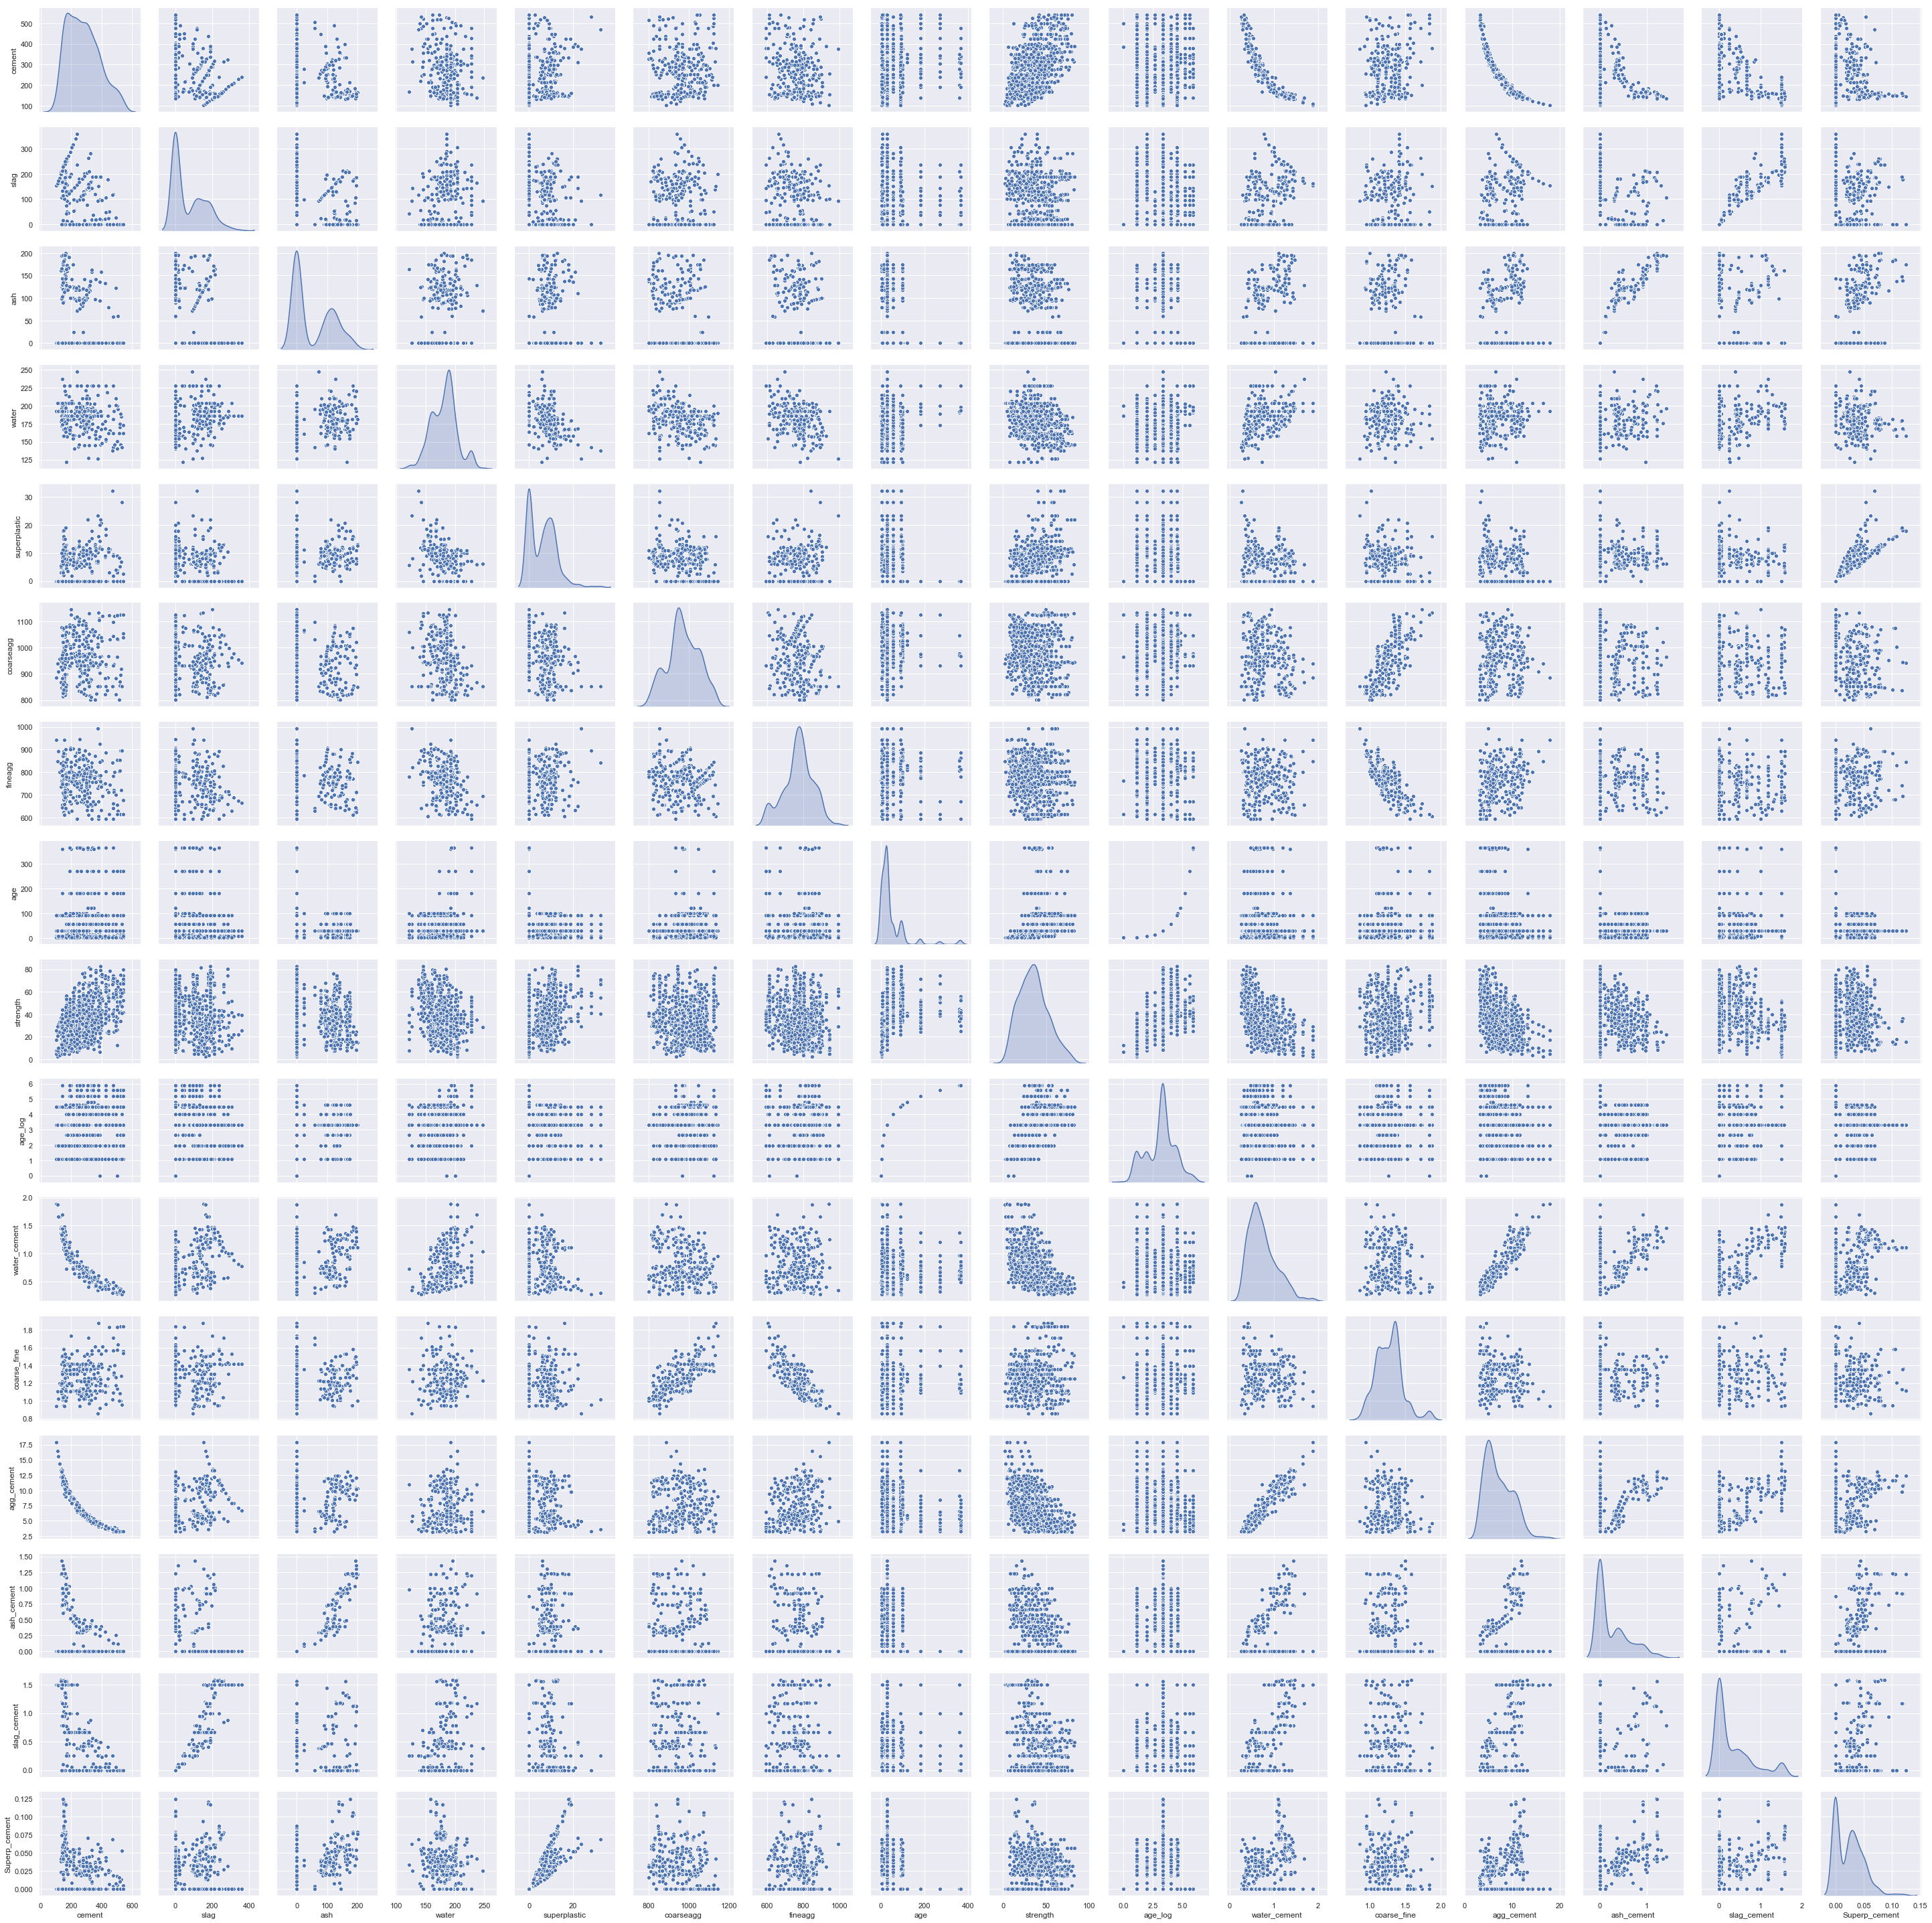

In [30]:
sns.pairplot(Concrete_df,diag_kind='kde') 

In [31]:
corr = Concrete_df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_log,water_cement,coarse_fine,agg_cement,ash_cement,slag_cement,Superp_cement
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832,-0.001688,-0.879130,0.144226,-0.922534,-0.517164,-0.487476,-0.296392
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829,-0.017805,0.357322,0.054375,0.240343,-0.223945,0.904555,0.049354
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755,-0.014294,0.246004,-0.099457,0.351127,0.940649,-0.212466,0.605615
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633,0.165943,0.332968,0.229285,0.009320,-0.210720,0.187276,-0.512831
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079,-0.042885,-0.223215,-0.302406,-0.083592,0.322097,-0.081383,0.836010
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935,-0.040159,-0.034255,0.670902,0.135076,0.020343,-0.221187,-0.139361
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241,-0.113917,0.066595,-0.835861,0.267836,0.065059,-0.191686,0.166813
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873,0.763490,-0.029268,0.131635,-0.103339,-0.133307,-0.056082,-0.192095
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000,0.552180,-0.500692,0.049028,-0.484489,-0.181980,-0.069018,0.115235
age_log,-0.001688,-0.017805,-0.014294,0.165943,-0.042885,-0.040159,-0.113917,0.763490,0.552180,1.000000,0.024720,0.069792,-0.024559,0.008612,-0.019504,-0.003244


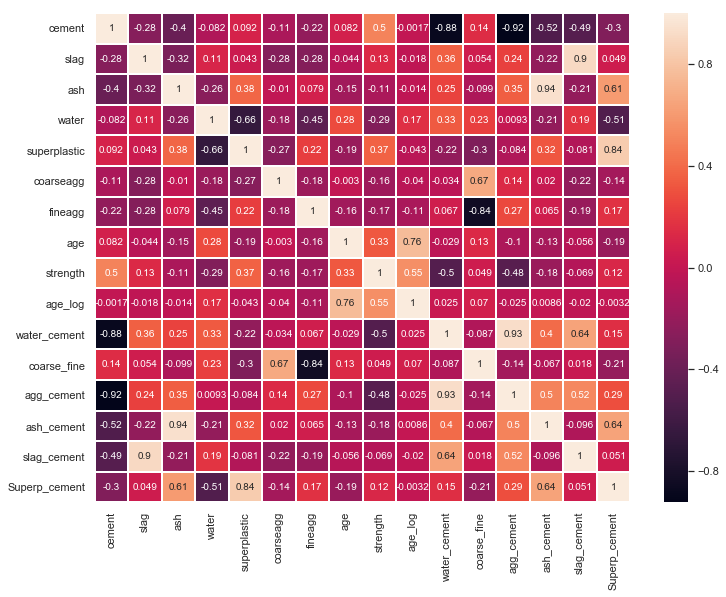

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True,linewidths=1)

#### Reassessment of predictors after adding composite features 

##### Following attributes can be dropped due to their relatively weak correlation with strength 
1. slag 
2. ash 
3. coarse_fine
4. slag_cement
5. superp_cement  

In [33]:
Concrete_df_new = Concrete_df
Concrete_df_new.drop(columns='slag',axis=1, inplace=True)
Concrete_df_new.drop(columns='ash',axis=1, inplace=True)
Concrete_df_new.drop(columns='coarse_fine',axis=1, inplace=True)
Concrete_df_new.drop(columns='slag_cement',axis=1, inplace=True)
Concrete_df_new.drop(columns='Superp_cement',axis=1, inplace=True)
# Concrete_df_new.drop(columns='age',axis=1, inplace=True) 
# A drop in accuracy was noticed after dropping 'age', so it is kept along with age_log attribute. 

In [34]:
Concrete_df_new.head()

,cement,water,superplastic,coarseagg,fineagg,age,strength,age_log,water_cement,agg_cement,ash_cement
0,141.3,203.5,0.0,971.8,748.5,28,29.89,3.332205,1.440198,12.174805,0.000000
1,168.9,158.3,10.8,1080.8,796.2,14,23.51,2.639057,0.937241,11.113085,0.735938
2,250.0,187.4,5.5,956.9,861.2,28,29.22,3.332205,0.749600,7.272400,0.382800
3,266.0,228.0,0.0,932.0,670.0,28,45.85,3.332205,0.857143,6.022556,0.000000
4,154.8,193.3,9.1,1047.4,696.7,28,18.29,3.332205,1.248708,11.266796,0.000000


#### Complexity of the model 

Higher degree modelling can be employed if the accuracy is low, as some of the attributes 
have slight curvilinearity. 

## Exploring Gaussians 

Multivariate analysis and Pairplot indicates two Gaussians for most attributes, and 5 for age. 

##### K-Means clustering and elbow method to find optimum number of clusters 

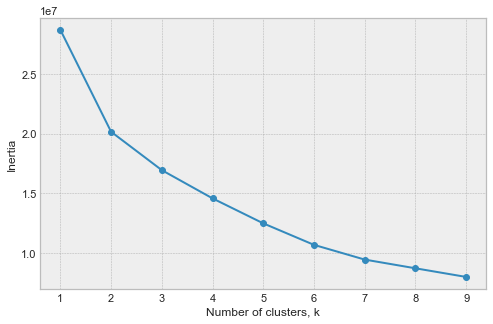

In [35]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Concrete_df_new.drop('strength',axis=1))
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

##### Clustering analysis 

By applying elbow method, it seems optimum number of clusters is two. 
However, for simplicity, we will proceed without splitting the data set into clusters.  

##### Split the dataset into attributes and class

In [36]:
Concrete_df_new_y = Concrete_df_new["strength"]

In [37]:
Concrete_df_new_X = Concrete_df_new[Concrete_df_new.columns[0:11]]
Concrete_df_new_X.drop(columns='strength',axis=1, inplace=True)

In [38]:
Concrete_df_new_X.head()

,cement,water,superplastic,coarseagg,fineagg,age,age_log,water_cement,agg_cement,ash_cement
0,141.3,203.5,0.0,971.8,748.5,28,3.332205,1.440198,12.174805,0.000000
1,168.9,158.3,10.8,1080.8,796.2,14,2.639057,0.937241,11.113085,0.735938
2,250.0,187.4,5.5,956.9,861.2,28,3.332205,0.749600,7.272400,0.382800
3,266.0,228.0,0.0,932.0,670.0,28,3.332205,0.857143,6.022556,0.000000
4,154.8,193.3,9.1,1047.4,696.7,28,3.332205,1.248708,11.266796,0.000000


##### Apply standardization 

Use Z scaler to standardize values 

In [39]:
sc = StandardScaler()
X_std =  sc.fit_transform(Concrete_df_new_X)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
Concrete_df_new_y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [41]:
X_std_df = pd.DataFrame(X_std)

## Model Building, Tuning and Feature Importance

##### Training & Test Split

In [42]:
test_size = 0.30 # 70:30 training and test set
seed = 365  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std_df, Concrete_df_new_y, test_size=test_size, random_state=seed)

##### Linear Regression model 

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for 0 is 3.341454366604346
The coefficient for 1 is -10.964528622294516
The coefficient for 2 is 0.6483769533733305
The coefficient for 3 is -3.7901650881418574
The coefficient for 4 is -5.285042260489075
The coefficient for 5 is -2.9019332431714058
The coefficient for 6 is 12.069829305751558
The coefficient for 7 is 5.005439076977526
The coefficient for 8 is -6.440276447813279
The coefficient for 9 is -2.7928968488869303


In [45]:
regression_model.score(X_train, y_train)

0.7990323719514087

In [46]:
regression_model.score(X_test, y_test)

0.7553194293240387

##### Conclusion on model performance and feature importance 

1. superplastic is the weakest predictor.  

2. water, age_log, water_cement and agg_cement are most effective predictors. 

3. The accuracy of the model is lower than the required range of 85-95%. 

4. Since the scores in train as well as test datasets are similar, we can conclude that 
this model is not an overfit model. 


### Model Tuning Approach

1. Let us try using regularized models like RIDGE and LASSO.

2. If the accuracy does not improve, we can try using polynomial transformation.

##### Regularized RIDGE model 

In [47]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [  3.34700861 -10.8442747    0.67471222  -3.82720726  -5.31617023
  -2.89775521  12.05676302   4.63105907  -6.06488503  -2.80429707]


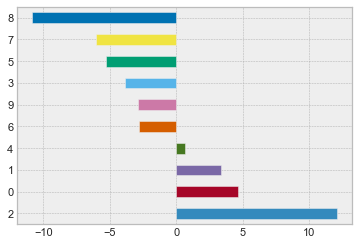

In [49]:
feat_importances = pd.Series(ridge.coef_ , index=np.argsort(ridge.coef_))
feat_importances.nlargest(10).plot(kind='barh')

##### Regularized LASSO model 

In [50]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 3.47757341 -8.88289399  1.04704459 -3.90967084 -5.24054058 -2.19408926
 11.2507866  -0.         -1.51235625 -2.54225692]


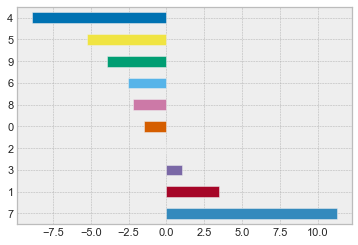

In [51]:
feat_importances = pd.Series(lasso.coef_ , index=np.argsort(lasso.coef_))
feat_importances.nlargest(10).plot(kind='barh')

##### Comparison of scores from various models 

In [52]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7990323719514087
0.7553194293240387


In [53]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7990248368803865
0.7553665933935478


In [54]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7953180465171859
0.7597729698758103


##### Conclusion on RIDGE and LASSO models 

Ridge and Lasso models do not bring about any significant improvement in the accuracy. 
Hence polynomical transformation can be tried. 

##### Polynomial Transformation  

In [55]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
#poly = PolynomialFeatures(2)

In [56]:
X_poly = poly.fit_transform(X_std_df)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Concrete_df_new_y, test_size=0.30, random_state=1)
X_train.shape

(721, 56)

In [57]:
# Fitting a simple non regularized linear model on poly features
regression_model.fit(X_train, y_train)
print(regression_model.coef_)

[ 4.70864066e-13  3.79872042e+13 -3.67908071e+12  2.39728245e+00
 -2.53353795e+12 -2.61245735e+12  3.21546003e+00  9.27268947e+00
  1.08906671e+13  3.05262851e+13 -3.27734375e+00  2.23632812e-01
 -4.38281250e+00  2.44287109e+00  2.46289062e+00  1.05859375e+00
 -2.18359375e+00 -6.05046028e+12  2.09764088e+13 -3.81738281e+00
  5.06054688e+00 -2.11425781e+00 -2.13183594e+00  2.77734375e+00
 -4.86035156e+00 -2.68261719e+00 -3.04896495e+12 -4.12792969e+00
 -1.40649414e+00 -9.25781250e-01  2.82128906e+00 -1.94824219e+00
 -2.05781250e+01  1.46298828e+01 -4.36230469e+00  2.30273438e+00
  3.27838135e+00 -1.89941406e+00  1.20932773e+12 -1.39453125e+00
  2.17651367e+00  2.51660156e+00 -2.34863281e+00  1.24699814e+12
 -4.33496094e+00  2.30444336e+00 -1.04394531e+00  7.62792969e+00
 -5.66796875e+00  4.43359375e+00  1.30175781e+00 -3.09082031e+00
 -2.27539062e+00 -2.30957031e+00  1.17880859e+01 -1.22026367e+01]


In [58]:
# Fitting Ridge model on poly features
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [  0.           1.23542955  -6.0100268    2.48136097  -3.0433276
  -3.93546333   3.37526253   9.13853767  -1.94307642  -1.27844849
  -3.40699344   0.14923612  -4.81570361   2.16515725   2.08285509
   0.70132461  -1.97571361  -1.62798881  -1.47941172  -3.55442491
   4.18605433  -1.80375945  -1.71098718   2.98201852  -4.91251882
  -2.86058242   4.69291288  -3.10935783  -0.75243705  -0.28239466
   2.86529681  -1.99092497 -16.36886786  10.1899744   -4.08923338
   2.32188646   3.27364747  -1.92610463   1.70182843  -0.85916189
   1.91364076   2.32425448  -2.29299436   5.28252529  -3.63825866
   1.92218322  -1.13792083   6.43850212  -4.73881849   4.17901318
   1.53636453  -3.15289193  -2.22685131  -2.12575264   8.68860939
  -9.08244876]


In [59]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8636908599218829
0.8381129859439895


In [60]:
print("Ridge picked " + str(sum(ridge.coef_ != 0)) + " variables and eliminated the other " +  str(sum(ridge.coef_ == 0)) + " variables")

Ridge picked 55 variables and eliminated the other 1 variables


In [61]:
# Fitting Lasso model on poly features
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          4.61154582 -6.79009946  1.66654616 -3.0832899  -4.42127584
  0.         10.64476967 -0.         -0.65591708 -2.1366042  -0.
 -3.03508569  0.91094434  0.         -1.53729022 -0.         -0.
 -0.         -0.53592212  1.1105436  -0.          0.05877461  0.
 -1.34338025 -0.18158144  2.00196491  0.          0.75239029  0.69902228
  0.12193647  0.         -2.4003911  -0.         -3.44737805  1.62962843
  0.49904046 -0.53900915 -0.         -0.          0.88658696 -0.22464677
 -0.98710832 -0.         -0.17555346  0.83530817 -0.28093548  0.35707785
  0.          1.09037084 -0.         -0.42213195 -0.94185346 -0.
  0.         -0.        ]


In [62]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8442008042889235
0.829816232956414


In [63]:
print("Lasso picked " + str(sum(lasso.coef_ != 0)) + " variables and eliminated the other " +  str(sum(lasso.coef_ == 0)) + " variables")

Lasso picked 35 variables and eliminated the other 21 variables


### Statistical conclusion for predicting model performance range at 95% confidence level

##### Ridge Model using Polynomial Transformation of degree 2 gives the best accuracy (> 85%)

In [64]:
# Estimate the standard deviation for prediction for Ridge 
stdev = np.sqrt(sum((ridge.predict(X_train) - y_train)**2) / (len(y_train) - 2))
stdev

6.114906302583045

In [65]:
# Check correspondent Gaussian critical value for Lasso 
# For significance level 95% it is 1.96
Dev_95 = stdev*1.96
Dev_95

11.985216353062768

In [66]:
# Confidence intervals for 'strength' are (prediction - 1.96*stdev, prediction + 1.96*stdev) 
print("Lower range for 'strength' with 95% confidence for Ridge is Predicted Value - " +str(Dev_95))
print("Upper range for 'strength' with 95% confidence for Ridge is Predicted Value + " +str(Dev_95))

Lower range for 'strength' with 95% confidence for Ridge is Predicted Value - 11.985216353062768
Upper range for 'strength' with 95% confidence for Ridge is Predicted Value + 11.985216353062768
